In [1]:
import math
import numpy as np
import random
import scipy
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
import seaborn as sns
import scipy.integrate as integrate
import scipy.special as special

In [3]:
sns.set_style(style="ticks")
sns.set_context('notebook')

In [118]:
#---start of def---
def initial_cond_u(x,init_type=1):
    if(init_type==1):
        return ((np.heaviside(1-x,1))*(np.heaviside(1+x,1)))*((1-np.multiply(x,x))*(1-np.multiply(x,x)))
    else:
        return np.zeros(len(x))
#---end of def---
#---start of def---
def initial_cond_ut(x):
        return np.zeros(len(x))
#---end of def---
#---start of def---
def boundary_condition(t,w0):
    return np.sin(t*w0)
#---end of def---
#---start of def---
def initial_cond_u(x,w0=2,init_type=1):
    if(init_type==1):
        return ((np.heaviside(1-x,1))*(np.heaviside(1+x,1)))*((1-np.multiply(x,x))*(1-np.multiply(x,x)))
    else:
        return np.zeros(len(x))
#---end of def---
#---start of def---
def U1(u0, h, k, q):    
#     up1=np.hstack([u0[1:], u0[:1]])
#     u=np.array(u0)
#     um1=np.hstack([u0[1], u0[1:]])
#     a = up1-2*u+um1
#     b=up1+um1
#     sol=u0 - ((k*k)/(2*h*h)) * a - ((q*q*k*k)/4) *  b
#     sol[-1]=0
    u=np.array(u0)
    sol=[0 for i in range(len(u0))]
    
    alpha=(((k*k)/(h*h))-(((q*k)*(q*k))/2))
    beta=2*(1-((k*k)/(h*h)))
    sol[0]=(alpha*u[1]+beta*u[0]+alpha*u[1])/2
    for i in range(1,len(u)-2):
            sol[i]=(alpha*u[i+1]+beta*u[i]+alpha*u[i-1])/2
    sol[-1]=0
    return sol
#---end of def---
#---start of def---
def U2(u0, u1, h, k, q):    
    u=np.array(u1)
    sol=[0 for i in range(len(u1))]
    
    alpha=(((k*k)/(h*h))-(((q*k)*(q*k))/2))
    beta=2*(1-((k*k)/(h*h)))
    sol[0]=(alpha*u[1]+beta*u[0]+alpha*u[1])-u0[0]
    for i in range(1,len(u)-1):
            sol[i]=(alpha*u[i+1]+beta*u[i]+alpha*u[i-1]) -u0[i]
    sol[-1]=0
    return sol
#---end of def---
#---start of def---
def solver(u0,u1,h,k,q,steps):
    for i in range(steps-1):
        U = U2(u0,u1,h,k,q)
        u0=u1
        u1=U
    return u1
#---end of def---
#---start of def---
def exact_q_0(x,t):
    return 0.5*(initial_cond_u(x-t,init_type=1)+initial_cond_u(x+t,init_type=1))
#---end of def---
#---start of def---
def exact_q_not_0_p1(x,t,q):
    ind1=np.arcsin(((1-x)/t) +0j)
    ind2=-np.arcsin(((1+x)/t) +0j)
    if(ind1.imag==0):
        b=min(np.pi/2, ind1)
    else:
        b=np.pi/2
    if(ind2.imag==0):
        a=max(-np.pi/2, ind2)
    else:
        a=-np.pi/2
    J1=integrate.quad(lambda y: (special.jv(1,q*t*np.cos(y))*(1-(x+t*np.sin(y))*(x+t*np.sin(y)))*(1-(x+t*np.sin(y))*(x+t*np.sin(y)))),a,b)
    J=0 if (x-t>1) else J1[0]
    return 0.5*(initial_cond_u(x-t,init_type=1)+initial_cond_u(x+t,init_type=1)-q*t*J)
#---end of def---
#---start of def---
def exact_q_not_0(x,t,q):
    return np.array([exact_q_not_0_p1(x_,t,q) for x_ in x])
#---end of def---
#---start of def---
def f_tilde_p1(k):
    return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
#---end of def---
#---start of def---
def f_tilde(k):
    return np.array([f_tilde_p1(k_) for k_ in k])
#---end of def---
#---start of def---
def f_stationary_phase(x,t,q):
#     alpha=np.sqrt(q)*t/(np.sqrt(2*np.pi)*np.power((t*t-x*x),3/4))
#     k=q*x/(np.sqrt(t*t-x*x))
#     theta=q*np.sqrt(t*t-x*x) + (np.pi/4)
#     if(sum(x_>=t for x_ in x)>0):
#         print ("Error 1: require t>|x| for all x")
#         return False
    sol=[]
    x=list(x)
    for i in range(len(x)):
        k=q*x[i]/(np.sqrt(t**2-x[i]**2))
        if(abs(x[i])>=t*1):
            sol.append(0)
        else:
            sol.append(np.sqrt(q)*t*f_tilde([k])*np.cos(q*(np.sqrt(t**2-x[i]**2))+(np.pi/4))/(np.sqrt((2*np.pi))*np.power((t**2-x[i]**2),3/4)))
    return np.array(sol)
#     return alpha*f_tilde(k)*np.cos(theta)
#---end of def---
#---start of def---
#---end of def---
#---start of def---

# Question 1

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/3077141936.py:3: RuntimeWarning: divide by zero encountered in true_divide
  yp=(np.sqrt(q**2+x**2))/x
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


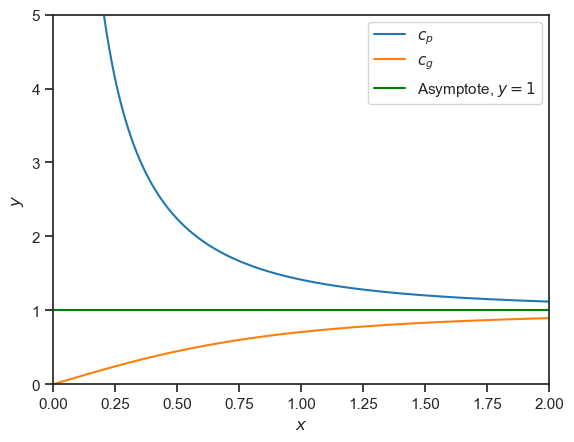

In [473]:
x=np.arange(0.0,10,0.0005)
q=1
yp=(np.sqrt(q**2+x**2))/x
yg=x/(np.sqrt(q**2+x**2))

plt.plot(x,yp, label='$c_{p}$')
plt.plot(x,yg, label='$c_{g}$')
plt.axhline(1,color='g',label='Asymptote, $y=1$')
plt.axis([0, 2, 0, 5])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.savefig('fig1.eps')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


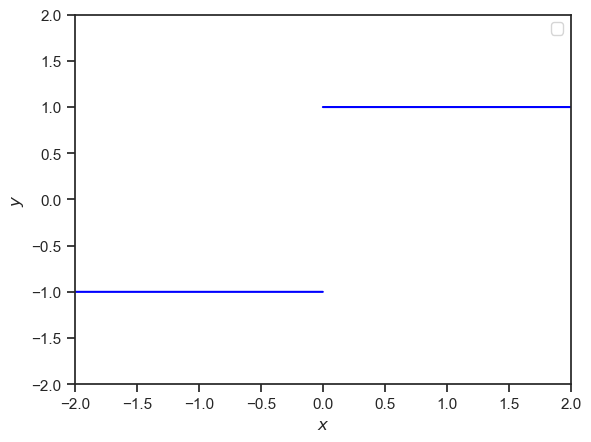

In [478]:
x=np.arange(0.0,10,0.0005)
x2=np.arange(-10.0,0.0,0.0005)
q=1
yp=[1 for i in range(len(x))]
yg=[-1 for i in range(len(x2))]

plt.axis([-2, 2, -2, 2])
plt.plot(x,yp,'blue')
plt.plot(x2,yg,'blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.savefig('fig2.eps')
plt.show()

# Question 3

$$\frac{u_i^{j+1}-2u_i^j+u_i^{j-1}}{(\Delta t)^2} - \frac{u_{i+1}^{j}-2u_i^j+u_{i-1}^{j}}{(\Delta x)^2} = -q^2 \left ( \frac{u_{i+1}^{j}+u_{i-1}^{j}}{2}\right )$$
That is 
$$u_i^{j+1}=2u_i^j-u_i^{j-1}+\frac{(\Delta t)^2}{(\Delta x)^2}\left ( u_{i+1}^{j}-2u_i^j+u_{i-1}^{j} \right ) -\frac{(q \Delta t)^2}{2} \left ( u_{i+1}^{j}+u_{i-1}^{j} \right )$$
We have 
$$u_i^{-1}=u_i^{1}$$
$$u_{-1}^{j}=u_{1}^{j},  u_{N}^{j}=0$$
where we have taken L large enough for last condition
For the first time step:
$$u_i^{1}=2u_i^0-u_i^{-1}+\frac{(\Delta t)^2}{(\Delta x)^2}\left ( u_{i+1}^{0}-2u_i^0+u_{i-1}^{0} \right ) -\frac{(q \Delta t)^2}{2} \left ( u_{i+1}^{0}+u_{i-1}^{0} \right )$$
i.e
$$u_i^{1}=u_i^0+\frac{(\Delta t)^2}{2(\Delta x)^2}\left ( u_{i+1}^{0}-2u_i^0+u_{i-1}^{0} \right ) -\frac{(q \Delta t)^2}{4} \left ( u_{i+1}^{0}+u_{i-1}^{0} \right )$$


## (a) (i) $q=0$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


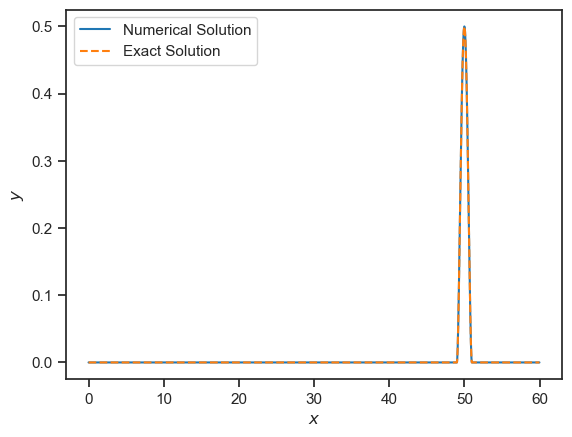

In [479]:
h=0.01
k=0.01
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
plt.plot(x,u_final,label='Numerical Solution')
u_anal=exact_q_not_0(x,t,q)
plt.plot(x,u_anal,'--',label='Exact Solution')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig3.eps')
plt.show()

### (a) (i) (1) $h=0.01$

In [318]:
h=0.01
frac=1
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.01
k/h 1
Max Error 5.0459636469213365e-14
Mean Error 3.174433604164178e-14


In [405]:
h=0.01
frac=0.7
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.01
k/h 0.7
Max Error 0.003877641830970672
Mean Error 2.6952765354978957e-05


In [319]:
h=0.01
frac=0.5
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.01
k/h 0.5
Max Error 0.004978782892600142
Mean Error 5.291456650576513e-05


In [402]:
h=0.01
frac=1.001
k=frac*h
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.01
k/h 1.001
Max Error 7.12282627655415e+184
Mean Error 4.690174308842572e+183


In [404]:
h=0.01
frac=1.0001
k=frac*h
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.01
k/h 1.0001
Max Error 1.1371840661976347e+52
Mean Error 1.091864130750299e+51


In [320]:
h=0.01
frac=1.1
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:52: RuntimeWarning: overflow encountered in double_scalars
  sol[i]=(alpha*u[i+1]+beta*u[i]+alpha*u[i-1]) -u0[i]
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:52: RuntimeWarning: invalid value encountered in double_scalars
  sol[i]=(alpha*u[i+1]+beta*u[i]+alpha*u[i-1]) -u0[i]
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:50: RuntimeWarning: overflow encountered in double_scalars
  sol[0]=(alpha*u[1]+beta*u[0]+alpha*u[1])-u0[0]
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:50: RuntimeWarning: invalid value encountered in double_scalars
  sol[0]=(alpha*u[1]+beta*u[0]+alpha*u[1])-u0[0]


h 0.01
k/h 1.1
Max Error nan
Mean Error nan


### (a) (i) (2) $h=0.1$

In [419]:
h=0.1
frac=1
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.1
k/h 1
Max Error 4.85722573273506e-15
Mean Error 8.296546320322543e-16


In [323]:
h=0.1
frac=0.5
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.1
k/h 0.5
Max Error 0.10433739010934762
Mean Error 0.003533653874143304


In [363]:
h=0.1
frac=1.01
k=frac*h
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.1
k/h 1.01
Max Error 3.2719019600302153e+55
Mean Error 3.162691732848076e+54


In [324]:
h=0.1
frac=1.1
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.1
k/h 1.1
Max Error 1.2780487363699053e+170
Mean Error 8.452956343096569e+168


### (a) (i) (3) $h=0.5$

In [336]:
h=0.6
frac=1
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.6
k/h 1
Max Error 0.2559999999999988
Mean Error 0.006727999999999999


In [337]:
h=0.6
frac=0.5
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.6
k/h 0.5
Max Error 0.27212702868752275
Mean Error 0.03558011338721346


In [338]:
h=0.6
frac=1.1
k=(frac*h)
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.6
k/h 1.1
Max Error 7.347893751574626e+26
Mean Error 9.003217335170253e+25


In [362]:
h=0.6
frac=2
k=frac*h
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.6
k/h 2
Max Error 8.80031011195271e+45
Mean Error 5.439300077260764e+44


## (a) (ii) $q=1$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


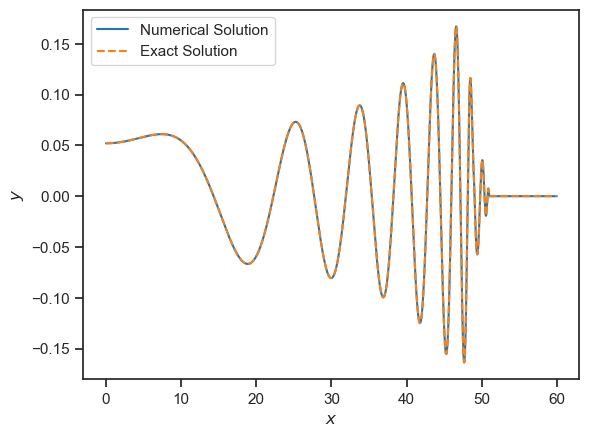

In [480]:
h=0.01
k=0.01
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
plt.plot(x,u_final,label='Numerical Solution')
u_anal=exact_q_not_0(x,t,q)
plt.plot(x,u_anal,'--',label='Exact Solution')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig4.eps')
plt.show()

### (a) (ii) (1) $h=0.01$

In [339]:
h=0.01
frac=1
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.01
k/h 1
Max Error 0.00042759431971278045
Mean Error 3.161753529171554e-05


In [340]:
h=0.01
frac=0.5
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.01
k/h 0.5
Max Error 0.003912952795207056
Mean Error 0.00011949427975765437


In [351]:
h=0.01
frac=1.001
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.01
k/h 1.001
Max Error 4.309866819517182e+183
Mean Error 2.841380633784487e+182


In [349]:
h=0.01
frac=1.1
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:52: RuntimeWarning: overflow encountered in double_scalars
  sol[i]=(alpha*u[i+1]+beta*u[i]+alpha*u[i-1]) -u0[i]
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:52: RuntimeWarning: invalid value encountered in double_scalars
  sol[i]=(alpha*u[i+1]+beta*u[i]+alpha*u[i-1]) -u0[i]
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:50: RuntimeWarning: overflow encountered in double_scalars
  sol[0]=(alpha*u[1]+beta*u[0]+alpha*u[1])-u0[0]
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:50: RuntimeWarning: invalid value encountered in double_scalars
  sol[0]=(alpha*u[1]+beta*u[0]+alpha*u[1])-u0[0]


h 0.01
k/h 1.1
Max Error nan
Mean Error nan


### (a) (ii) (2) $h=0.1$

In [342]:
h=0.1
frac=1
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.1
k/h 1
Max Error 0.04252752688935886
Mean Error 0.003184425401806746


In [343]:
h=0.1
frac=0.5
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.1
k/h 0.5
Max Error 0.14767871688023043
Mean Error 0.00826536257688351


In [354]:
h=0.1
frac=1.01
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.1
k/h 1.01
Max Error 3.4207304469416e+51
Mean Error 3.3956021930903245e+50


In [344]:
h=0.1
frac=1.1
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.1
k/h 1.1
Max Error 8.22990513321862e+168
Mean Error 5.446757194847787e+167


### (a) (ii) (3) $h=0.6$

In [345]:
h=0.6
frac=1
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.6
k/h 1
Max Error 0.3254587805709509
Mean Error 0.047036136042006696


In [346]:
h=0.6
frac=0.5
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.6
k/h 0.5
Max Error 0.2920034402612176
Mean Error 0.047610233524724016


In [358]:
h=0.6
frac=1.1
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.6
k/h 1.1
Max Error 1.536486543567048e+18
Mean Error 2.1008464318872896e+17


In [361]:
h=0.6
frac=2
k=frac*h
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 0.6
k/h 2
Max Error 8.80031011195271e+45
Mean Error 5.439300077260764e+44


### (a) (ii) (4) $h=2.1$

In [424]:
h=2.1
frac=1
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 2.1
k/h 1
Max Error 217669.5273322361
Mean Error 35412.586565589285


In [425]:
h=2.1
frac=0.5
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 2.1
k/h 0.5
Max Error 129072.92355196078
Mean Error 40365.46230825442


In [426]:
h=2.1
frac=1.1
k=frac*h
q=1
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 2.1
k/h 1.1
Max Error 1285359546.6019258
Mean Error 298929428.4969326


In [427]:
h=2.1
frac=2
k=frac*h
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final=solver(u0,u1,h,k,q,steps)
u_anal=exact_q_not_0(x,t,q)
er=np.abs(u_final-u_anal)
print("h",h)
print("k/h",frac)
print("=======")
print("Max Error", max(er))
print("Mean Error", np.mean(er))

h 2.1
k/h 2
Max Error 3984500221569.0
Mean Error 528195778330.5294


## (b) $\tilde{f}(k)$

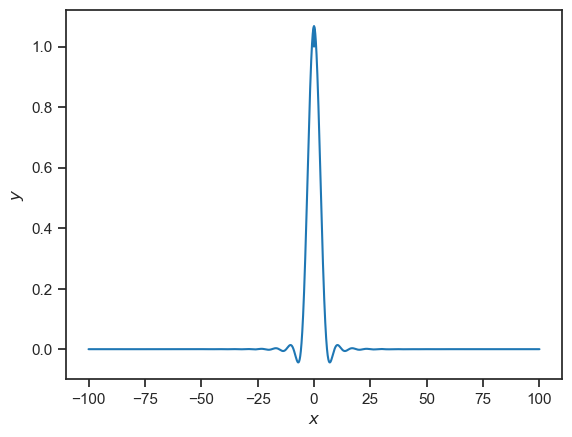

In [481]:
k=np.arange(-100,100,0.01)
ft=f_tilde(k)
plt.plot(k,ft)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig5.eps')
plt.show()

## (c) (i) $q=0$

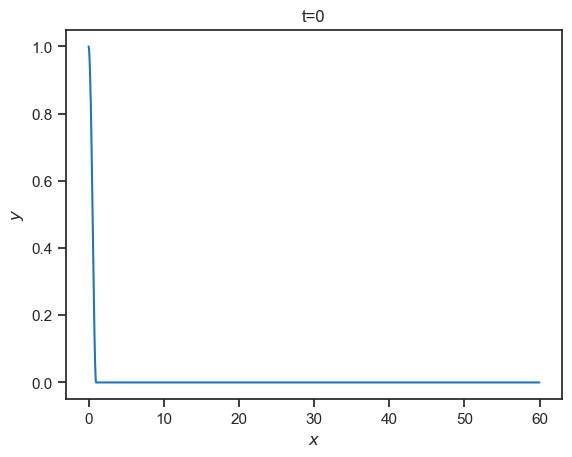

In [181]:
h=0.01
k=0.01
q=0
x=np.arange(0,60,h)
t=0
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final0_0=solver(u0,u1,h,k,q,steps)
plt.title("t="+str(t))
plt.plot(x,u_final0_0,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

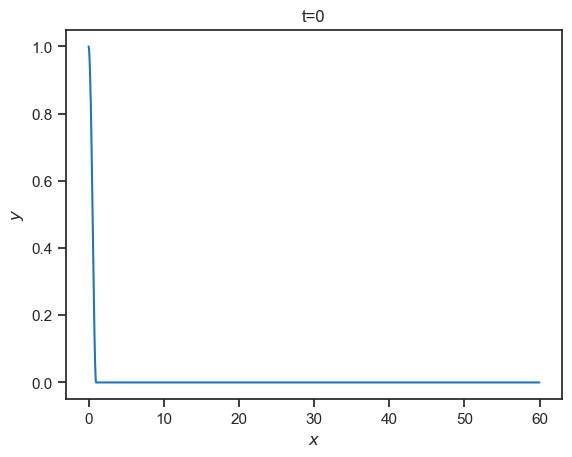

In [190]:
t=0
plt.title("t="+str(t))
plt.plot(x,u_final0_0,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

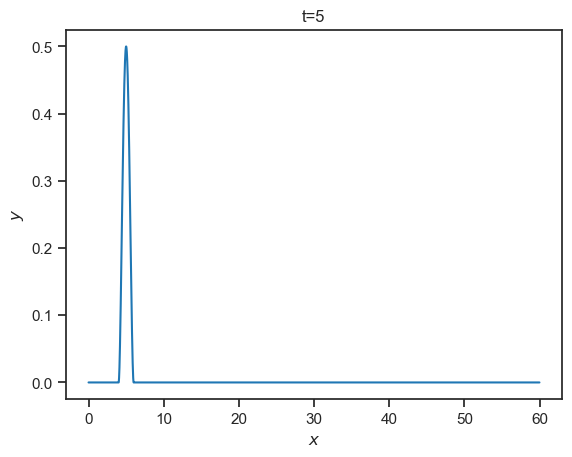

In [182]:
h=0.01
k=0.01
q=0
x=np.arange(0,60,h)
t=5
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final0_1=solver(u0,u1,h,k,q,steps)
plt.title("t="+str(t))
plt.plot(x,u_final0_1,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

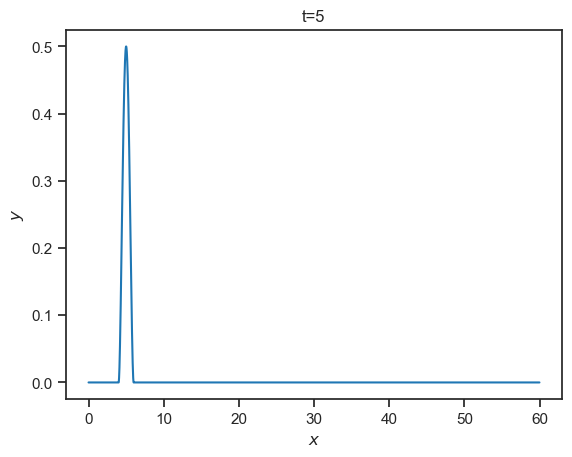

In [191]:
t=5
plt.title("t="+str(t))
plt.plot(x,u_final0_1,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

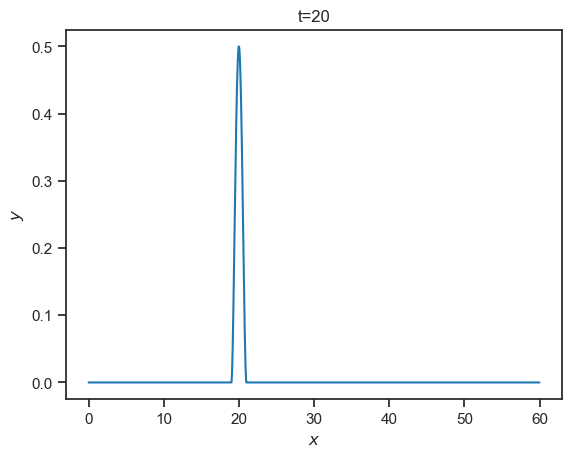

In [183]:
h=0.01
k=0.01
q=0
x=np.arange(0,60,h)
t=20
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final0_2=solver(u0,u1,h,k,q,steps)
plt.title("t="+str(t))
plt.plot(x,u_final0_2,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

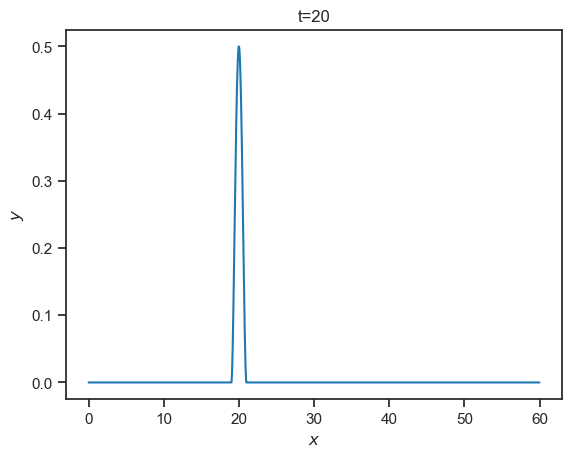

In [192]:
t=20
plt.title("t="+str(t))
plt.plot(x,u_final0_2,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

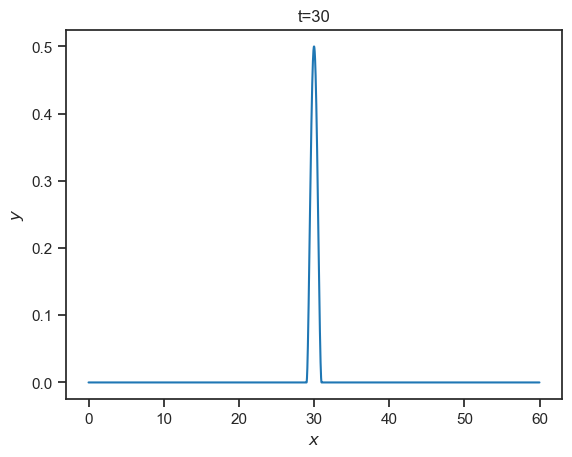

In [184]:
h=0.01
k=0.01
q=0
x=np.arange(0,60,h)
t=30
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final0_3=solver(u0,u1,h,k,q,steps)
plt.title("t="+str(t))
plt.plot(x,u_final0_3,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

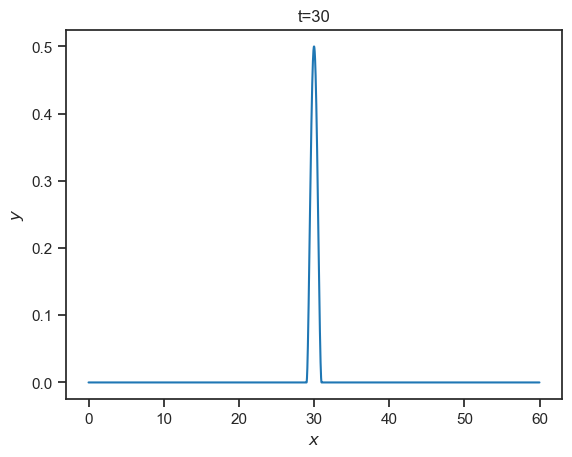

In [193]:
t=30
plt.title("t="+str(t))
plt.plot(x,u_final0_3,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

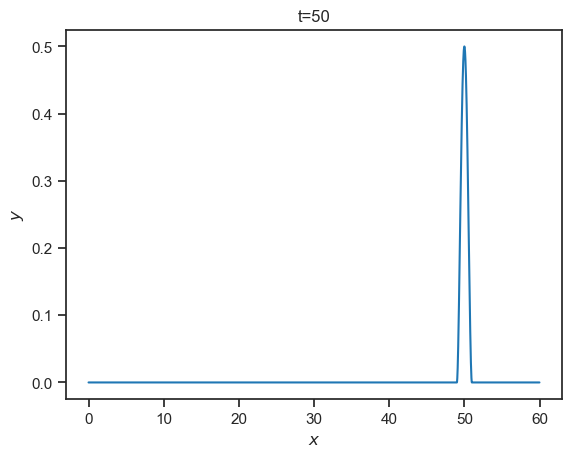

In [185]:
h=0.01
k=0.01
q=0
x=np.arange(0,60,h)
t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final0_4=solver(u0,u1,h,k,q,steps)
plt.title("t="+str(t))
plt.plot(x,u_final0_4,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

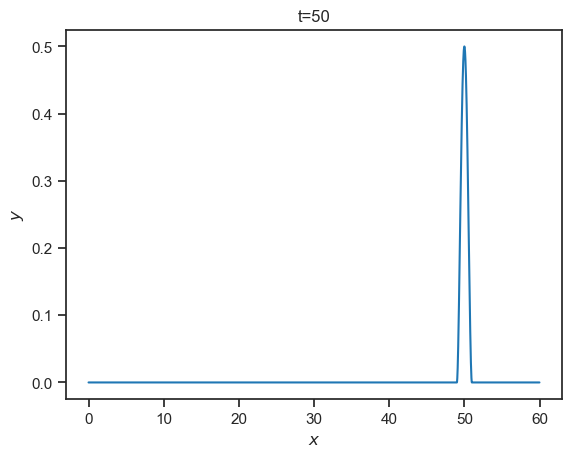

In [483]:
t=50
plt.title("t="+str(t))
plt.plot(x,u_final0_4,label='Numerical Solution')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig7.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


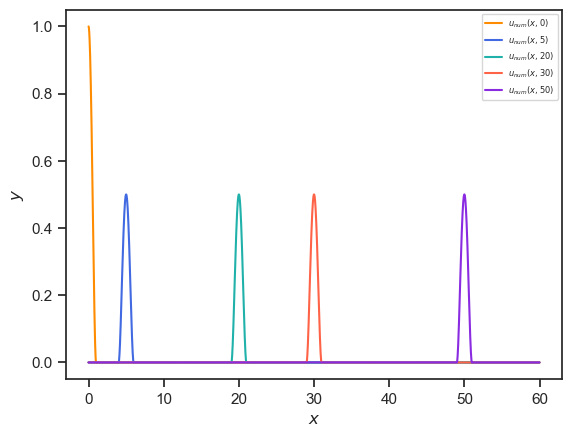

In [482]:
plt.plot(x,u_final0_0,'-',color='darkorange',label='$u_{num}(x,0)$')
plt.plot(x,u_final0_1,'-',color='royalblue',label='$u_{num}(x,5)$')
plt.plot(x,u_final0_2,'-',color='lightseagreen',label='$u_{num}(x,20)$')
plt.plot(x,u_final0_3,'-',color='tomato',label='$u_{num}(x,30)$')
plt.plot(x,u_final0_4,'-',color='blueviolet',label='$u_{num}(x,50)$')

plt.legend(prop={'size': 6})
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig6.eps')
plt.show()

## (c) (ii) $q=1$

In [264]:
q=1

In [265]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=0
y0=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final_0=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))


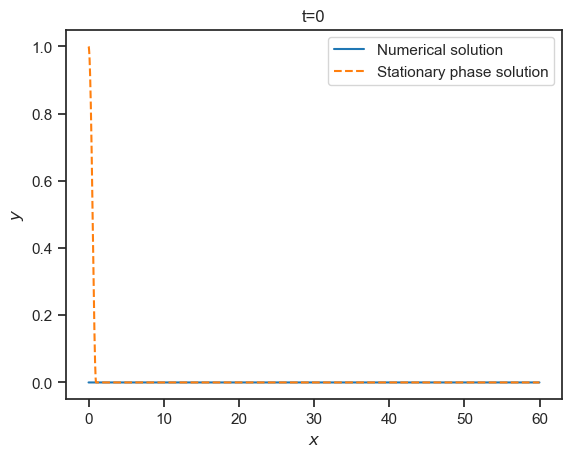

In [266]:
t=0
plt.plot(x,y0,label='Numerical solution')
plt.plot(x,u_final_0,'--',label='Stationary phase solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [267]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=5
y1=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final_1=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

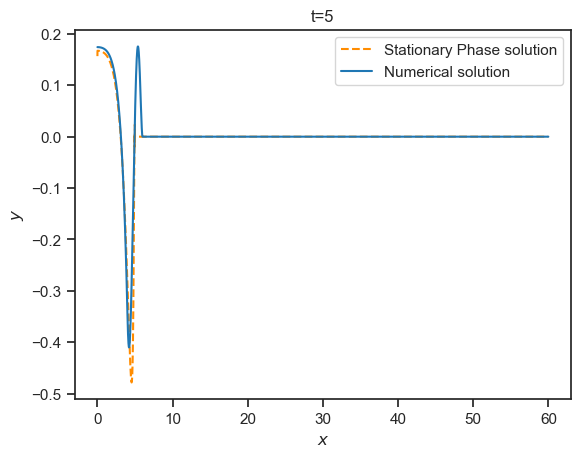

In [268]:
t=5
plt.plot(x,y1,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final_1,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [269]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=20
y2=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final_2=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

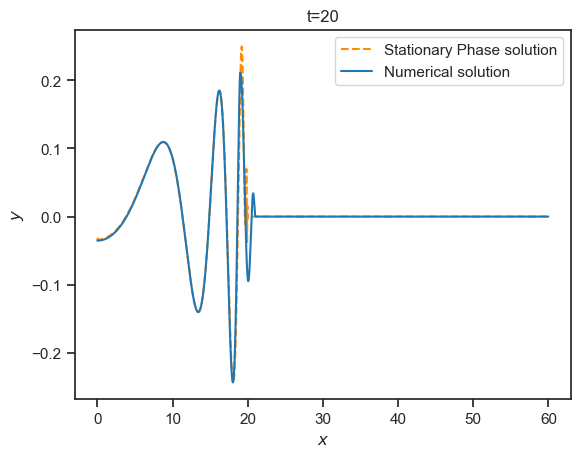

In [270]:
t=20
plt.plot(x,y2,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final_2,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [271]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=30
y3=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final_3=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

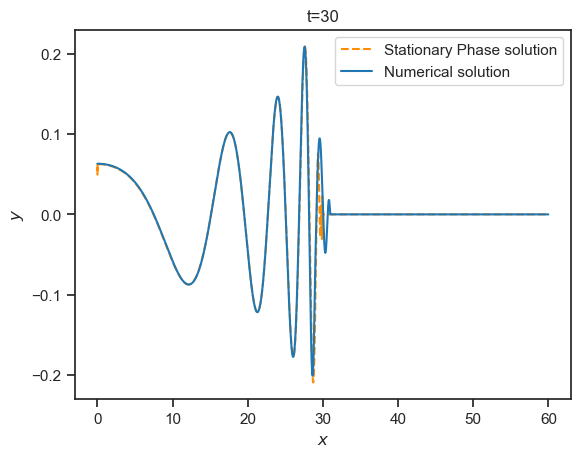

In [272]:
t=30
plt.plot(x,y3,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final_3,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [273]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=50
y4=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final_4=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


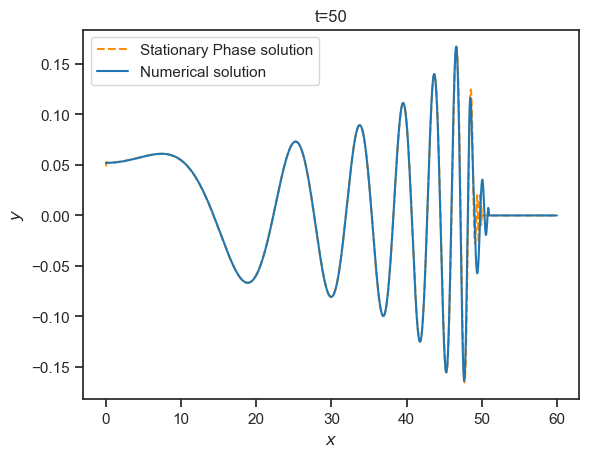

In [488]:
t=50
plt.plot(x,y4,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final_4,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig9.eps')
plt.show()

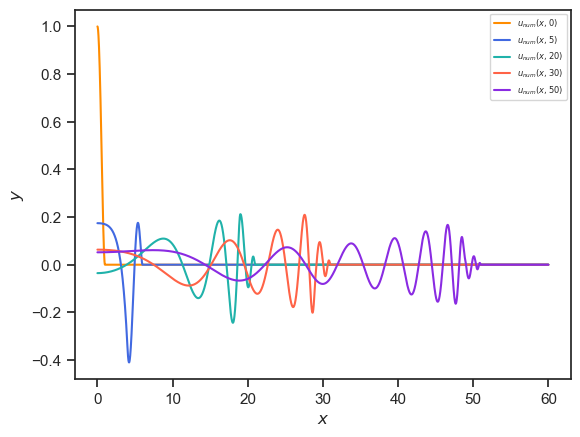

In [275]:
plt.plot(x,u_final_0,'-',color='darkorange',label='$u_{num}(x,0)$')
plt.plot(x,u_final_1,'-',color='royalblue',label='$u_{num}(x,5)$')
plt.plot(x,u_final_2,'-',color='lightseagreen',label='$u_{num}(x,20)$')
plt.plot(x,u_final_3,'-',color='tomato',label='$u_{num}(x,30)$')
plt.plot(x,u_final_4,'-',color='blueviolet',label='$u_{num}(x,50)$')
plt.legend(prop={'size': 6})
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


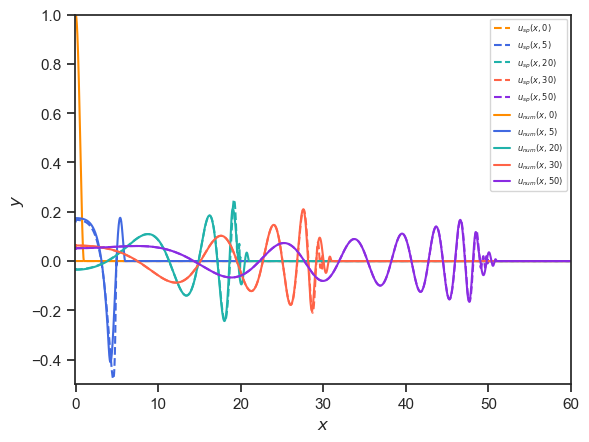

In [487]:
plt.plot(x,y0,'--',color='darkorange',label='$u_{sp}(x,0)$')
plt.plot(x,y1,'--',color='royalblue',label='$u_{sp}(x,5)$')
plt.plot(x,y2,'--',color='lightseagreen',label='$u_{sp}(x,20)$')
plt.plot(x,y3,'--',color='tomato',label='$u_{sp}(x,30)$')
plt.plot(x,y4,'--',color='blueviolet',label='$u_{sp}(x,50)$')

plt.plot(x,u_final_0,'-',color='darkorange',label='$u_{num}(x,0)$')
plt.plot(x,u_final_1,'-',color='royalblue',label='$u_{num}(x,5)$')
plt.plot(x,u_final_2,'-',color='lightseagreen',label='$u_{num}(x,20)$')
plt.plot(x,u_final_3,'-',color='tomato',label='$u_{num}(x,30)$')
plt.plot(x,u_final_4,'-',color='blueviolet',label='$u_{num}(x,50)$')
plt.legend(prop={'size': 6})
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-0.1,60)
plt.ylim(-0.5,1)
plt.savefig('fig8.eps')
plt.show()

## (c) (iii) $q$ small, but not $0$

### (c) (iii) (1) $q=0.2$

In [229]:
q=0.2

In [217]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=0
y10=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final1_0=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))


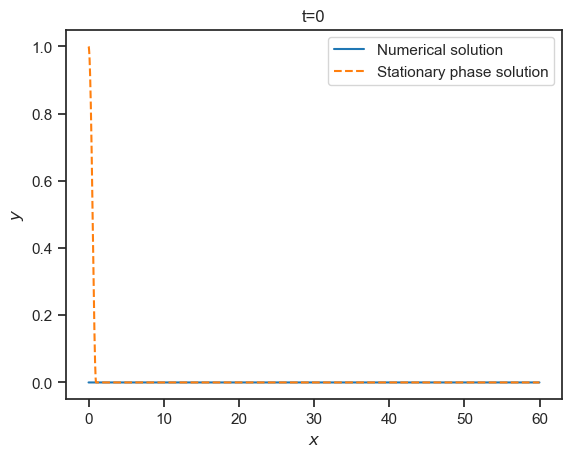

In [218]:
t=0
plt.plot(x,y10,label='Numerical solution')
plt.plot(x,u_final1_0,'--',label='Stationary phase solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [219]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=5
y11=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final1_1=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

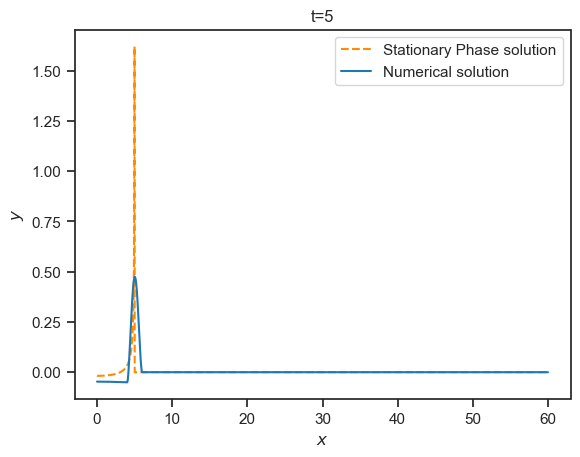

In [260]:
t=5
plt.plot(x,y11,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final1_1,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [221]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=20
y12=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final1_2=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

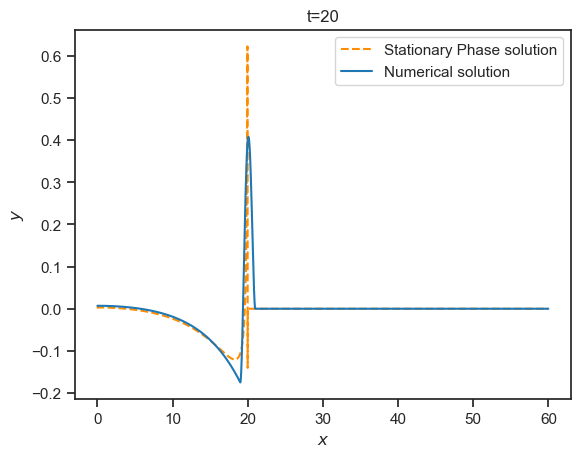

In [261]:
t=20
plt.plot(x,y12,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final1_2,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [230]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=30
y13=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final1_3=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

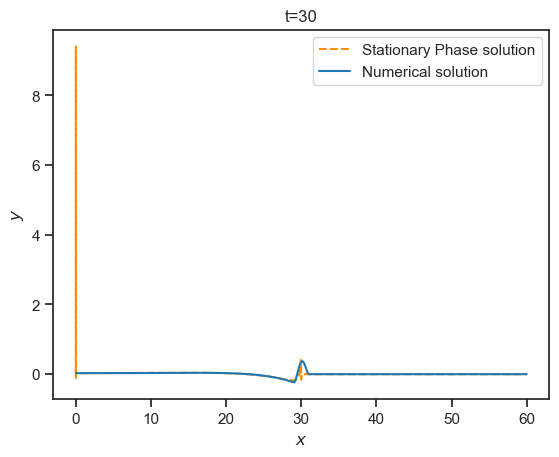

In [262]:
t=30
plt.plot(x,y13,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final1_3,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [232]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=50
y14=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final1_4=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

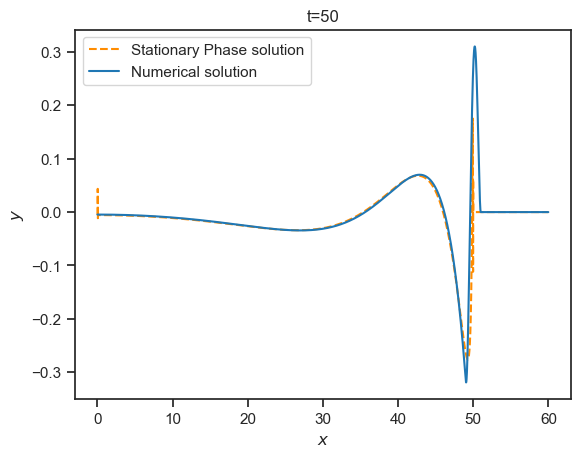

In [263]:
t=50
plt.plot(x,y14,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final1_4,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


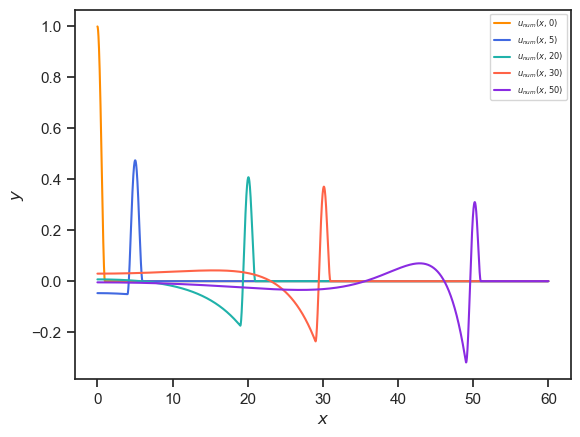

In [489]:
plt.plot(x,u_final1_0,'-',color='darkorange',label='$u_{num}(x,0)$')
plt.plot(x,u_final1_1,'-',color='royalblue',label='$u_{num}(x,5)$')
plt.plot(x,u_final1_2,'-',color='lightseagreen',label='$u_{num}(x,20)$')
plt.plot(x,u_final1_3,'-',color='tomato',label='$u_{num}(x,30)$')
plt.plot(x,u_final1_4,'-',color='blueviolet',label='$u_{num}(x,50)$')
plt.legend(prop={'size': 6})
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig10.eps')
plt.show()

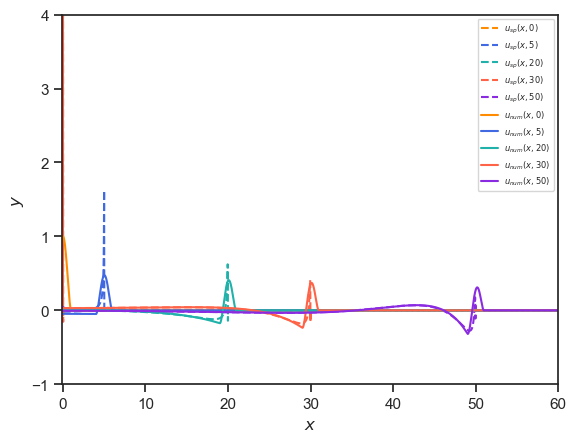

In [251]:
plt.plot(x,y10,'--',color='darkorange',label='$u_{sp}(x,0)$')
plt.plot(x,y11,'--',color='royalblue',label='$u_{sp}(x,5)$')
plt.plot(x,y12,'--',color='lightseagreen',label='$u_{sp}(x,20)$')
plt.plot(x,y13,'--',color='tomato',label='$u_{sp}(x,30)$')
plt.plot(x,y14,'--',color='blueviolet',label='$u_{sp}(x,50)$')

plt.plot(x,u_final1_0,'-',color='darkorange',label='$u_{num}(x,0)$')
plt.plot(x,u_final1_1,'-',color='royalblue',label='$u_{num}(x,5)$')
plt.plot(x,u_final1_2,'-',color='lightseagreen',label='$u_{num}(x,20)$')
plt.plot(x,u_final1_3,'-',color='tomato',label='$u_{num}(x,30)$')
plt.plot(x,u_final1_4,'-',color='blueviolet',label='$u_{num}(x,50)$')
plt.legend(prop={'size': 6})
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-0.1,60)
plt.ylim(-1,4)
plt.show()

### (c) (iii) (2) $q=0.01$

In [304]:
q=0.05

In [305]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=0
y20=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final2_0=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))


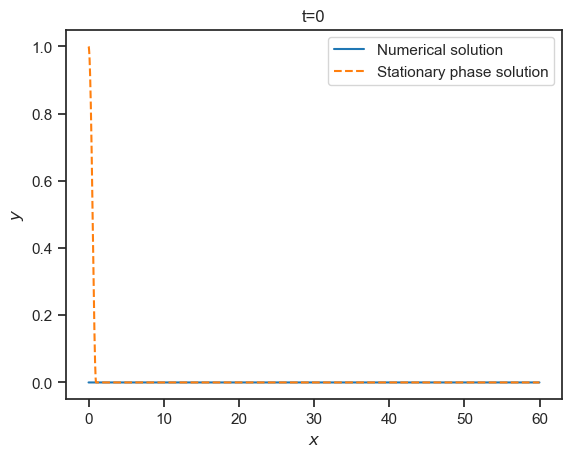

In [306]:
t=0
plt.plot(x,y20,label='Numerical solution')
plt.plot(x,u_final2_0,'--',label='Stationary phase solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [307]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=5
y21=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final2_1=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

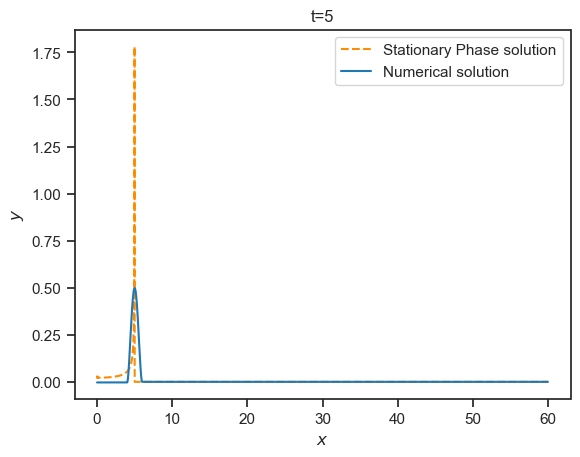

In [308]:
t=5
plt.plot(x,y21,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final2_1,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [309]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=20
y22=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final2_2=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

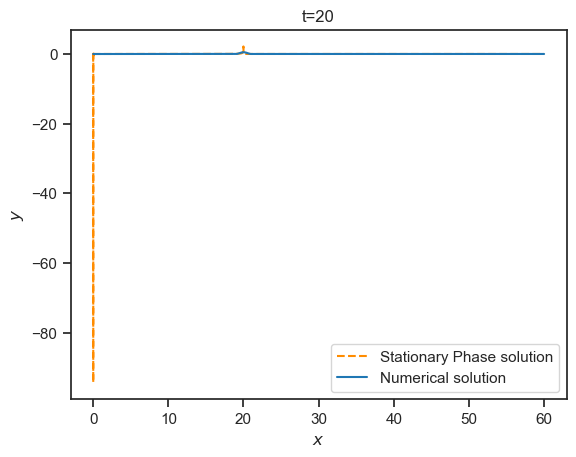

In [310]:
t=20
plt.plot(x,y22,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final2_2,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [311]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=30
y23=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final2_3=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

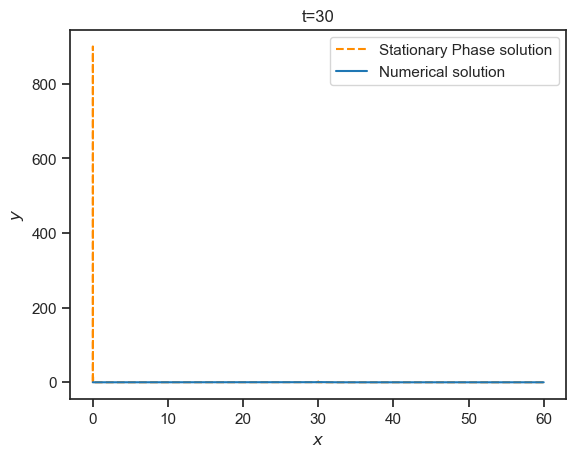

In [312]:
t=30
plt.plot(x,y23,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final2_3,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [313]:
h=0.01
k=0.01
x=np.arange(0,60,h)
t=50
y24=f_stationary_phase(x,t,q)
steps=int(np.ceil(t/k))
u0=initial_cond_u(x)
u1=U1(u0, h, k, q)
u_final2_4=solver(u0,u1,h,k,q,steps)

/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:90: RuntimeWarning: invalid value encountered in double_scalars
  return ((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))) if not(math.isnan(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k))))) and not(((-16*((3*k*np.cos(k))+((k*k-3)*np.sin(k)))/(k*k*k*k*k)))==0.0) else 1
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:107: RuntimeWarning: invalid value encountered in sqrt
  k=q*x[i]/(np.sqrt(t**2-x[i]**2))
/var/folders/f8/y02h__7916nb3jtq318mq8dm0000gn/T/ipykernel_10230/1191776789.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

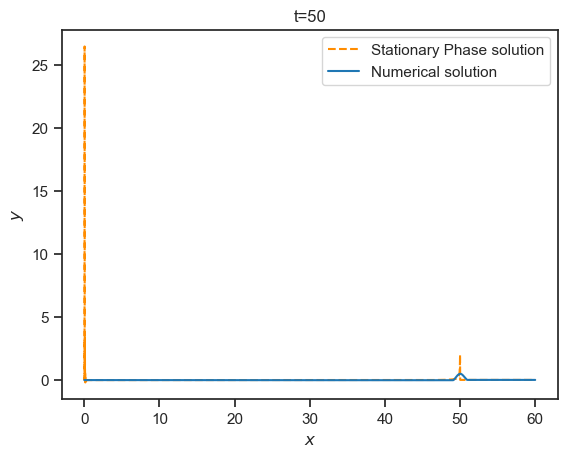

In [314]:
t=50
plt.plot(x,y24,'--',color='darkorange',label='Stationary Phase solution')
plt.plot(x,u_final2_4,label='Numerical solution')
plt.title("t="+str(t))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


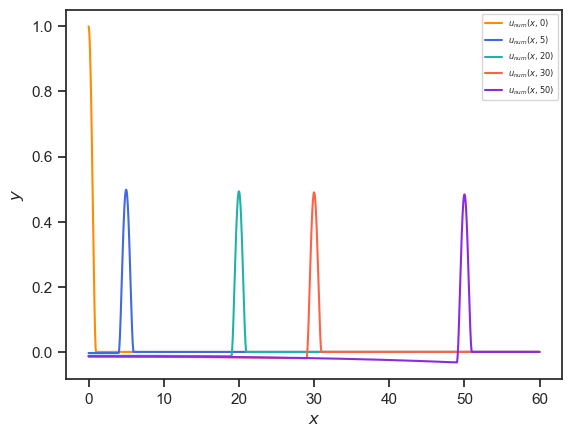

In [490]:
plt.plot(x,u_final2_0,'-',color='darkorange',label='$u_{num}(x,0)$')
plt.plot(x,u_final2_1,'-',color='royalblue',label='$u_{num}(x,5)$')
plt.plot(x,u_final2_2,'-',color='lightseagreen',label='$u_{num}(x,20)$')
plt.plot(x,u_final2_3,'-',color='tomato',label='$u_{num}(x,30)$')
plt.plot(x,u_final2_4,'-',color='blueviolet',label='$u_{num}(x,50)$')
plt.legend(prop={'size': 6})
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig11.eps')
plt.show()

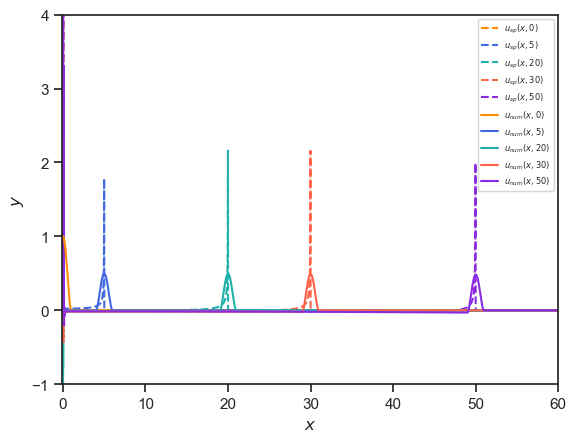

In [316]:
plt.plot(x,y20,'--',color='darkorange',label='$u_{sp}(x,0)$')
plt.plot(x,y21,'--',color='royalblue',label='$u_{sp}(x,5)$')
plt.plot(x,y22,'--',color='lightseagreen',label='$u_{sp}(x,20)$')
plt.plot(x,y23,'--',color='tomato',label='$u_{sp}(x,30)$')
plt.plot(x,y24,'--',color='blueviolet',label='$u_{sp}(x,50)$')

plt.plot(x,u_final2_0,'-',color='darkorange',label='$u_{num}(x,0)$')
plt.plot(x,u_final2_1,'-',color='royalblue',label='$u_{num}(x,5)$')
plt.plot(x,u_final2_2,'-',color='lightseagreen',label='$u_{num}(x,20)$')
plt.plot(x,u_final2_3,'-',color='tomato',label='$u_{num}(x,30)$')
plt.plot(x,u_final2_4,'-',color='blueviolet',label='$u_{num}(x,50)$')
plt.legend(prop={'size': 6})
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-0.1,60)
plt.ylim(-1,4)
plt.show()

# Question 4

In [396]:
#---start of def---
def initial_cond_u_2(x,init_type=1):
        return np.zeros(len(x))
#---end of def---
#---start of def---
def initial_cond_ut_2(x):
        return np.zeros(len(x))
#---end of def---
#---start of def---
def boundary_condition_2(t,w0):
    return np.sin(t*w0)
#---end of def---
#---start of def---
def initial_cond_u_2(x,w0=2,init_type=1):
        return np.zeros(len(x))
#---end of def---
#---start of def---
def U1_2(u0, h, k, q, w0):    
#     up1=np.hstack([u0[1:], u0[:1]])
#     u=np.array(u0)
#     um1=np.hstack([u0[1], u0[1:]])
#     a = up1-2*u+um1
#     b=up1+um1
#     sol=u0 - ((k*k)/(2*h*h)) * a - ((q*q*k*k)/4) *  b
#     sol[-1]=0
    u=np.array(u0)
    sol=[0 for i in range(len(u0))]
    alpha=(((k*k)/(h*h))-(((q*k)*(q*k))/2))
    beta=2*(1-((k*k)/(h*h)))
    #sol[0]=(alpha*u[1]+beta*u[0]+alpha*u[1])/2
    sol[0]=boundary_condition_2(k,w0)
    for i in range(1,len(u)-2):
            sol[i]=(alpha*u[i+1]+beta*u[i]+alpha*u[i-1])/2
    sol[-1]=0
    return sol
#---end of def---
#---start of def---
def U2_2(u0, u1, h, k, q,w0,t):    
    u=np.array(u1)
    sol=[0 for i in range(len(u1))]
    
    alpha=(((k*k)/(h*h))-(((q*k)*(q*k))/2))
    beta=2*(1-((k*k)/(h*h)))
    #sol[0]=(alpha*u[1]+beta*u[0]+alpha*u[1])-u0[0]
    #sol[0]=(alpha*u[1]+beta*u[0]+alpha*u[1])/2
    sol[0]=boundary_condition_2(t,w0)
    for i in range(1,len(u)-1):
            sol[i]=(alpha*u[i+1]+beta*u[i]+alpha*u[i-1]) -u0[i]
    sol[-1]=0
    return sol
#---end of def---
#---start of def---
def solver_2(u0,u1,h,k,q,steps,w0):
    for i in range(steps-1):
        t=k*(i+2)
        U = U2_2(u0,u1,h,k,q,w0,t)
        u0=u1
        u1=U
    return u1
#---end of def---
#---start of def---
def exact_q_0_2(x,t,w0):
    sol=[]
    for i in range(len(x)):
        if(x[i]<t):
            sol.append(boundary_condition_2((t-x[i]),w0))
        else:
            sol.append(0)
    return np.array(sol)
#---end of def---

## (a) $q=0$

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


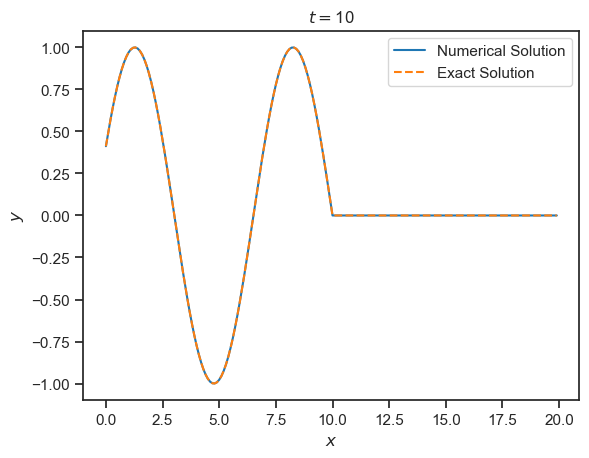

1.3322676295501878e-15
1.6257828416854636e-16


In [491]:
h=0.1
k=0.1
q=0
x=np.arange(0,20,h)
t=10
w0=0.9
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,label='Numerical Solution')
u_anal=exact_q_0_2(x,t,w0)
plt.plot(x,u_anal,'--',label='Exact Solution')
plt.legend()
plt.title('$t=$'+str(t))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig13.eps')
plt.show()
print(max(abs(u_final-u_anal)))
print(np.mean(abs(u_final-u_anal)))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


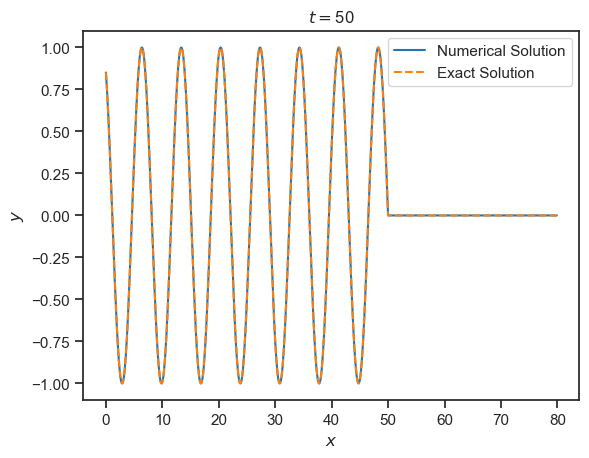

7.119305145408816e-15
9.684766009987467e-16


In [492]:
h=0.1
k=0.1
q=0
x=np.arange(0,80,h)
t=50
w0=0.9
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,label='Numerical Solution')
u_anal=exact_q_0_2(x,t,w0)
plt.plot(x,u_anal,'--',label='Exact Solution')
plt.legend()
plt.title('$t=$'+str(t))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig14.eps')
plt.show()
print(max(abs(u_final-u_anal)))
print(np.mean(abs(u_final-u_anal)))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


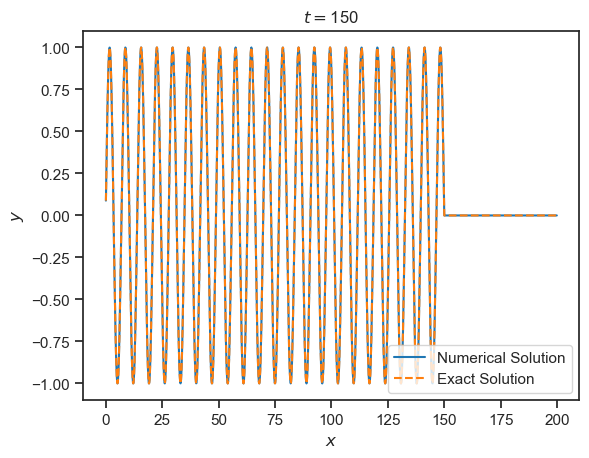

2.8400892748692286e-14
3.2520558511731077e-15


In [493]:
h=0.1
k=0.1
q=0
x=np.arange(0,200,h)
t=150
w0=0.9
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,label='Numerical Solution')
u_anal=exact_q_0_2(x,t,w0)
plt.plot(x,u_anal,'--',label='Exact Solution')
plt.legend()
plt.title('$t=$'+str(t))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig15.eps')
plt.show()
print(max(abs(u_final-u_anal)))
print(np.mean(abs(u_final-u_anal)))

## (b) $q=1$

0.1
0.1
0.1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.1


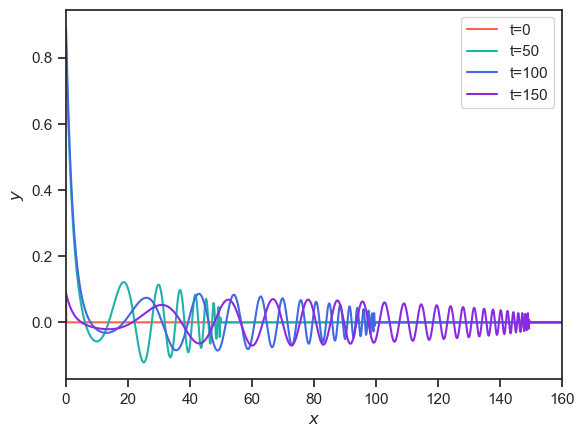

In [494]:
h=0.1
k=0.1
q=1
w0=0.9
x=np.arange(0,200,h)

t=0.01
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='tomato',label='t=0')
print(x[u_final.index(max(u_final[1:]))])

t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='lightseagreen',label='t=50')
print(x[u_final.index(max(u_final[1:]))])

t=100
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='royalblue',label='t=100')
print(x[u_final.index(max(u_final[1:]))])

t=150
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='blueviolet',label='t=150')
print(x[u_final.index(max(u_final[1:]))])

plt.legend()

plt.xlim(0,160)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig16.eps')
plt.show()


0.1
7.0
17.2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


41.5


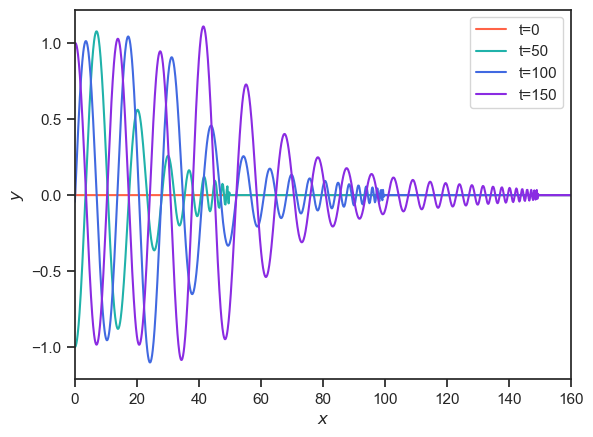

In [495]:
h=0.1
k=0.1
q=1
w0=1.1
x=np.arange(0,200,h)

t=0.01
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='tomato',label='t=0')
print(x[u_final.index(max(u_final[1:]))])

t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='lightseagreen',label='t=50')
print(x[u_final.index(max(u_final[1:]))])

t=100
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='royalblue',label='t=100')
print(x[u_final.index(max(u_final[1:]))])

t=150
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='blueviolet',label='t=150')
print(x[u_final.index(max(u_final[1:]))])

plt.legend()

plt.xlim(0,160)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig17.eps')
plt.show()

0.1
26.3
59.6


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


98.7


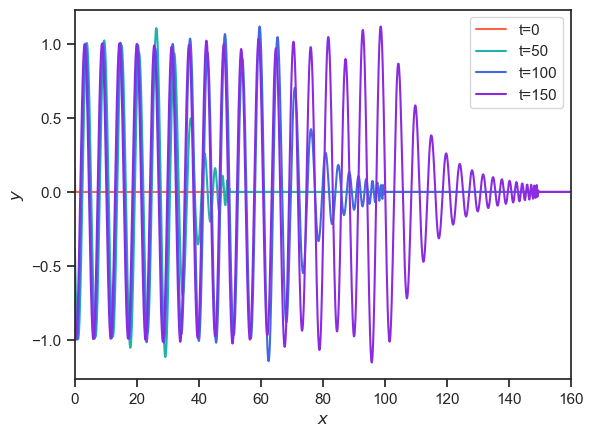

In [496]:
h=0.1
k=0.1
q=1
w0=1.5
x=np.arange(0,200,h)

t=0.01
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='tomato',label='t=0')
print(x[u_final.index(max(u_final[1:]))])

t=50
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='lightseagreen',label='t=50')
print(x[u_final.index(max(u_final[1:]))])

t=100
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='royalblue',label='t=100')
print(x[u_final.index(max(u_final[1:]))])

t=150
steps=int(np.ceil(t/k))
u0=initial_cond_u_2(x)
u1=U1_2(u0, h, k, q,w0)
u_final=solver_2(u0,u1,h,k,q,steps,w0)
plt.plot(x,u_final,color='blueviolet',label='t=150')
print(x[u_final.index(max(u_final[1:]))])

plt.legend()

plt.xlim(0,160)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('fig18.eps')
plt.show()